In [ ]:
import warnings; warnings.simplefilter('ignore')
from pathlib import Path

import numpy as np
import astropy.units as u
from sunpy.net import Fido, attrs as a
from sunpy.map import Map

from itipy.download.util import download_url

# SOHO/EIT

### Sample (ITI)

In [ ]:
sample_f = Path("../sample/iti-dataset/soho/171/2007-12-13T07:19:35.fits")
sample_map = Map(sample_f)
print("DATE-OBS:", sample_map.meta["DATE-OBS"])
print("EXPTIME :", sample_map.meta["EXPTIME"])
print("BUNIT   :", sample_map.meta["BUNIT"])

DATE-OBS: 2007-12-13T07:00:13.589
EXPTIME : 12.598
BUNIT   : counts / pixel


### SOHOEITDownloader

In [ ]:
from itipy.download.download_soho_eit import SOHOEITDownloader
from datetime import datetime

In [ ]:
downloader_f = Path("./data/soho/171/20071213_065622.fits")

if not downloader_f.exists():
    downloader = SOHOEITDownloader(ds_path="./data/soho", wavelengths=[171])

    d = datetime.strptime("2007-12-13T07:00:00", "%Y-%m-%dT%H:%M:%S")
    downloader.downloadDate(d)

downloader_map = Map(downloader_f)
print("DATE-OBS:", downloader_map.meta["DATE-OBS"])

2025-02-14 07:26:05,697 - SOHOEITDownloader - INFO - Start download: 2007-12-13T07:00:00
171: 100%|██████████| 4.02M/4.02M [00:02<00:00, 1.71MB/s]
2025-02-14 07:26:09,420 - SOHOEITDownloader - INFO - Finished: 2007-12-13T07:00:00


DATE-OBS: 2007-12-13T06:56:22.124Z


In [ ]:
downloaderl0_f = Path("./data/soho/171/20071213_070013.fits")

if not downloaderl0_f.exists():
    downloader = SOHOEITDownloader(ds_path="./data/soho", wavelengths=[171], level='L0')

    d = datetime.strptime("2007-12-13T07:00:00", "%Y-%m-%dT%H:%M:%S")
    downloader.downloadDate(d)

downloaderl0_map = Map(downloaderl0_f)
print("DATE-OBS:", downloaderl0_map.meta["DATE-OBS"])
print(downloaderl0_map.meta['comment'][:46])

2025-02-14 07:26:09,431 - SOHOEITDownloader - INFO - Start download: 2007-12-13T07:00:00
171: 100%|██████████| 2.02M/2.02M [00:02<00:00, 970kB/s] 
2025-02-14 07:26:16,668 - SOHOEITDownloader - INFO - Finished: 2007-12-13T07:00:00


DATE-OBS: 2007-12-13T07:00:13.589
CORRECTED DATE_OBS = '2007-12-13T06:56:22.124Z


### SunPy - VSO

In [ ]:
res = Fido.search(a.Time('2007-12-13T07:00:00', '2007-12-13T07:05:00'),
                  a.Instrument("EIT"),
                  a.Source("SOHO"),
                  a.Wavelength(171*u.AA))
res

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Extent Type,Size
,,,,Angstrom,,,,Mibyte
Time,Time,str4,str3,float64[2],str4,str9,str8,float64
2007-12-13 07:00:13.000,2007-12-13 07:00:25.000,SOHO,EIT,171.0 .. 171.0,SDAC,intensity,FULLDISK,2.01074


In [ ]:
vso_f = Path("./data/soho/171/efz20071213.070013")

if not vso_f.exists():
    Fido.fetch(res, path='./data/soho/171')

vso_map = Map(vso_f)
print("DATE-OBS:", vso_map.meta["DATE-OBS"])
print("EXPTIME :", vso_map.meta["EXPTIME"])
print("BUNIT   :", vso_map.meta["BUNIT"])

DATE-OBS: 2007-12-13T07:00:13.589
EXPTIME : 12.598
BUNIT   : counts / pixel


### URL - NASA/SDAC

- https://hpde.io/NASA/NumericalData/SOHO/EIT/Level0/PT12M.html
- https://hpde.io/NASA/NumericalData/SOHO/EIT/Level1/PT12M.html
- https://umbra.nascom.nasa.gov/pub/eit/lz/
- https://umbra.nascom.nasa.gov/pub/eit/l1/

In [ ]:
lz_url = "https://umbra.nascom.nasa.gov/pub/eit/lz/2007/12/efz20071213.070013"
lz_f = Path("./data/soho/171/L0_efz20071213.070013")
lz_f.parent.mkdir(parents=True, exist_ok=True)

if not lz_f.exists():
    download_url(url=lz_url, filename=lz_f)

lz_map = Map(lz_f)
print("DATE-OBS:", lz_map.meta["DATE-OBS"])
print("EXPTIME :", lz_map.meta["EXPTIME"])
print("BUNIT   :", lz_map.meta["BUNIT"])

efz20071213.070013: 100%|██████████| 2.02M/2.02M [00:02<00:00, 956kB/s] 

DATE-OBS: 2007-12-13T07:00:13.589
EXPTIME : 12.598
BUNIT   : counts / pixel


In [ ]:
l1_url = "https://umbra.nascom.nasa.gov/pub/eit/l1/2007/12/13/SOHO_EIT_171_20071213T070013_L1.fits"
l1_f = Path("./data/soho/171/SOHO_EIT_171_20071213T070013_L1.fits")

if not l1_f.exists():
    download_url(url=l1_url, filename=l1_f)

l1_map = Map(l1_f)
print("DATE-OBS:", l1_map.meta["DATE-OBS"])
print("BUNIT   :", l1_map.meta["BUNIT"])

SOHO_EIT_171_20071213T070013_L1.fits: 100%|██████████| 4.02M/4.02M [00:02<00:00, 1.67MB/s]

DATE-OBS: 2007-12-13T06:56:22.124Z
BUNIT   : DN/s


### EIT_PREP

- https://www.lmsal.com/solarsoft/
- https://umbra.nascom.nasa.gov/eit/eit_guide/
- https://soho.nascom.nasa.gov/solarsoft/soho/eit/idl/anal/eit_prep.pro

```
bash$ which idl
/usr/local/bin/idl
```

bash$
```
sudo apt install tcsh
tcsh
```

---

SSWDB -> `$HOME/soho/eit/calibrate`
```
IDL> sswdb_upgrade,/spawn
```

---

tcsh>
```
setenv IDL_DIR /usr/local
setenv IDL_PATH "<IDL_DEFAULT>"
setenv SSW $HOME/ssw
setenv SSW_INSTR "eit"
source $SSW/gen/setup/setup.ssw
sswidl
```

```
IDL> pwd
/path/to/InstrumentToInstrument/examples/compare
```
IDL>
```
file_mkdir, "./data/soho_prep/171"
cd, "./data/soho_prep/171"
f = "../../soho/171/L0_efz20071213.070013"
eit_prep, f, /outfits
```

In [ ]:
# L0 -> PREP
prep_f = Path("./data/soho_prep/171/eit_l1_20071213_070014.fits")
prep_map = Map(prep_f)
print("DATE-OBS:", prep_map.meta["DATE-OBS"])
print("BUNIT   :", prep_map.meta["BUNIT"])

DATE-OBS: 2007-12-13T07:00:13.589
BUNIT   : counts / pixel


## Comparison

In [ ]:
print("Sample")
print(sample_map.meta["DATE-OBS"])
print(sample_map.data.shape, sample_map.data.min(), sample_map.data.max())
print(sample_map.rotation_matrix)
print()
print("PREP")
print(prep_map.meta["DATE-OBS"])
print(prep_map.data.shape, prep_map.data.min(), prep_map.data.max())
print(prep_map.rotation_matrix)
print()
print("L1")
print(l1_map.meta["DATE-OBS"])
print(l1_map.data.shape, l1_map.data.min(), l1_map.data.max())
print(l1_map.rotation_matrix)
print()
print("Downloader L1")
print(downloader_map.meta["DATE-OBS"])
print(downloader_map.data.shape, downloader_map.data.min(), downloader_map.data.max())
print(downloader_map.rotation_matrix)
print()
print("VSO")
print(vso_map.meta["DATE-OBS"])
print(vso_map.data.shape, vso_map.data.min(), vso_map.data.max())
print(vso_map.rotation_matrix)
print()
print("L0")
print(lz_map.meta["DATE-OBS"])
print(lz_map.data.shape, lz_map.data.min(), lz_map.data.max())
print(lz_map.rotation_matrix)
print()
print("Downloader L0")
print(downloaderl0_map.meta["DATE-OBS"])
print(downloaderl0_map.data.shape, downloaderl0_map.data.min(), downloaderl0_map.data.max())
print(downloaderl0_map.rotation_matrix)
print()

Sample
2007-12-13T07:00:13.589
(1024, 1024) -0.22264822 2991.4424
[[ 1. -0.]
 [ 0.  1.]]

PREP
2007-12-13T07:00:13.589
(1024, 1024) -0.18891581940104585 3001.6049261756925
[[ 1. -0.]
 [ 0.  1.]]

L1
2007-12-13T06:56:22.124Z
(1024, 1024) -0.19396803 2990.3828
[[ 1.  0.]
 [-0.  1.]]

Downloader L1
2007-12-13T06:56:22.124Z
(1024, 1024) -0.19396803 2990.3828
[[ 1.  0.]
 [-0.  1.]]

VSO
2007-12-13T07:00:13.589
(1024, 1024) 833 3405
[[ 1. -0.]
 [ 0.  1.]]

L0
2007-12-13T07:00:13.589
(1024, 1024) 833 3405
[[ 1. -0.]
 [ 0.  1.]]

Downloader L0
2007-12-13T07:00:13.589
(1024, 1024) 833 3405
[[ 1. -0.]
 [ 0.  1.]]



### Peek

Sample


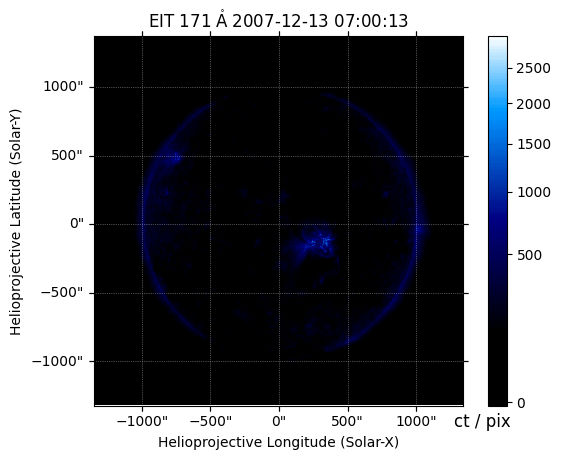

PREP


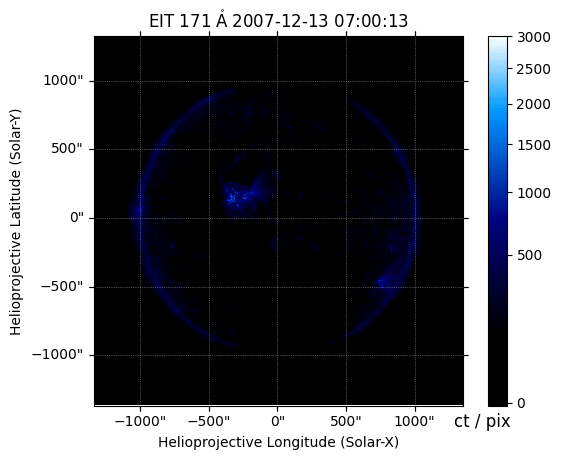

L1 == Downloader L1


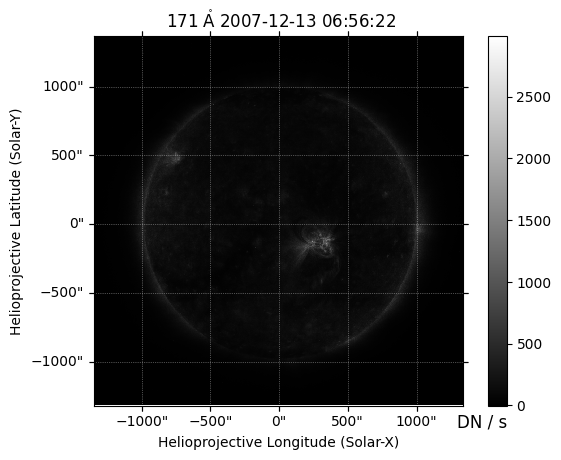

VSO


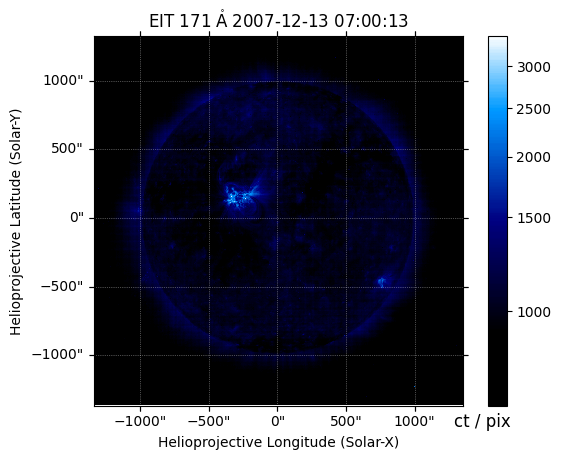

L0 == Downloader L0


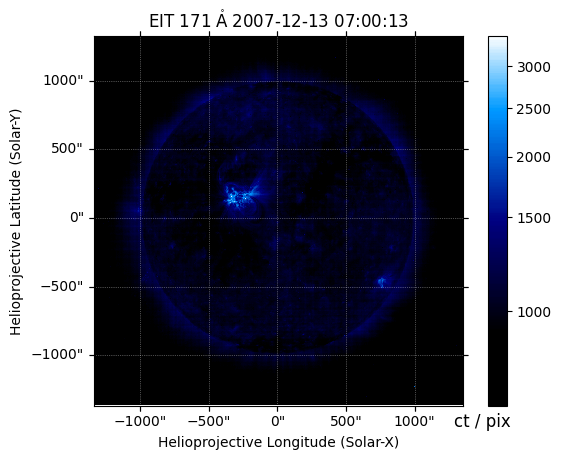

In [ ]:
print("Sample")
sample_map.peek()
print("PREP")
prep_map.peek()
print("L1 == Downloader L1")
l1_map.peek()
print("VSO")
vso_map.peek()
print("L0 == Downloader L0")
lz_map.peek()

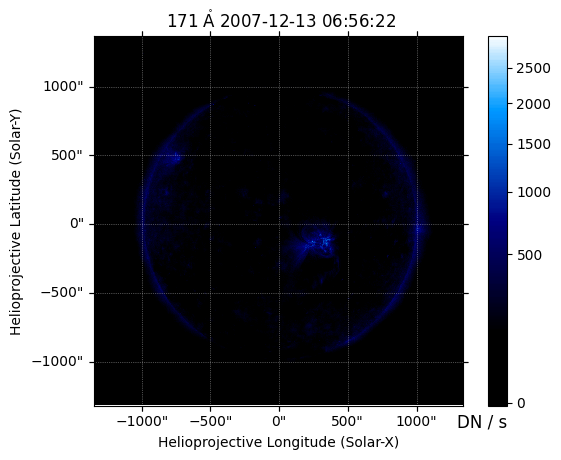

In [ ]:
from astropy.visualization import ImageNormalize, PowerStretch
l1_map.plot_settings['cmap'] = 'sohoeit171'
l1_map.plot_settings['norm'] = ImageNormalize(stretch=PowerStretch(0.5))
l1_map.peek()

In [ ]:
print("Sample == L1 (1e-1)  :", np.allclose(sample_map.data, l1_map.data, 
                                            atol=1e-1, rtol=1e-1))
print("Sample == PREP (1e-1) :", np.allclose(sample_map.data, prep_map.data[::-1, ::-1],
                                            atol=1e-1, rtol=1e-1))
print("L1 == PREP (1e-1)    :", np.allclose(l1_map.data, prep_map.data[::-1, ::-1],
                                            atol=1e-2, rtol=1e-1))
print("VSO == L0            :", np.allclose(vso_map.data, lz_map.data))
print("Downloader L1 == L1  :", np.allclose(downloader_map.data, l1_map.data))
print("Downloader L0 == L0  :", np.allclose(downloaderl0_map.data, lz_map.data))

Sample == L1 (1e-1)  : True
Sample == PREP (1e-1) : True
L1 == PREP (1e-1)    : True
VSO == L0            : True
Downloader L1 == L1  : True
Downloader L0 == L0  : True


In [ ]:
import matplotlib.pyplot as plt

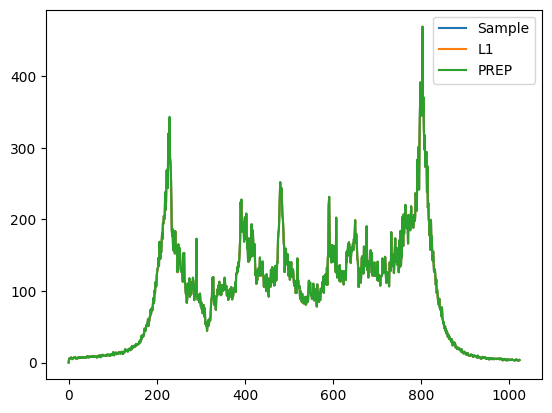

In [ ]:
idx = 256
plt.plot(sample_map.data[idx, :], label="Sample")
plt.plot(l1_map.data[idx, :], label="L1")
plt.plot(prep_map.data[::-1, ::-1][idx, :], label="PREP")
plt.legend()
plt.show()

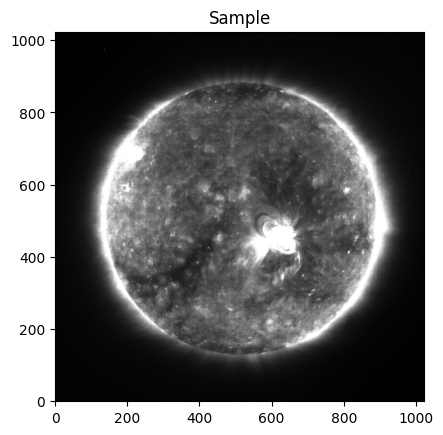

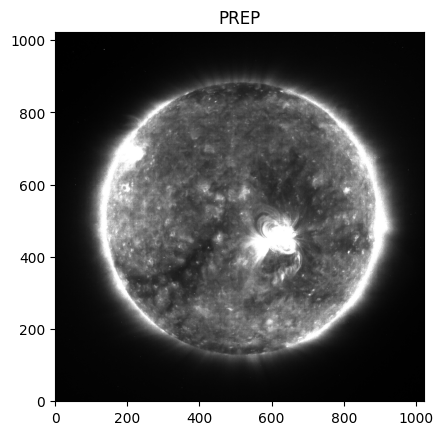

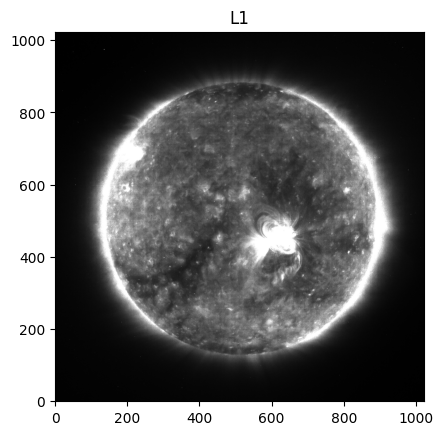

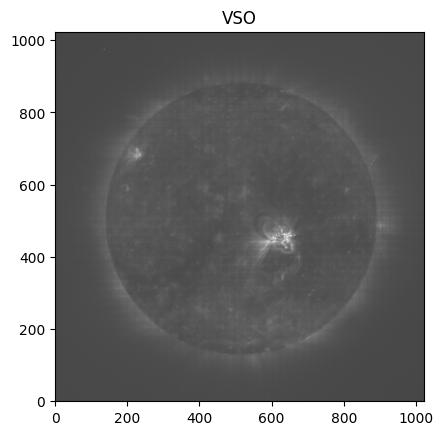

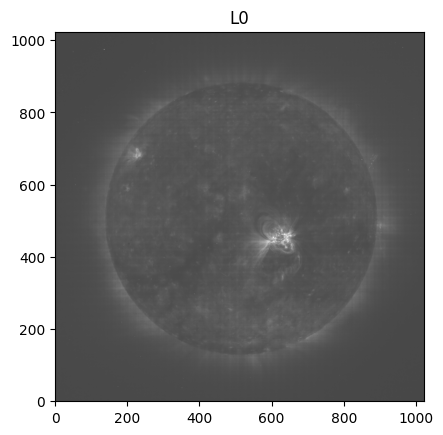

In [ ]:
plt.imshow(sample_map.data, cmap="gray", origin="lower", vmin=0, vmax=300)
plt.title("Sample")
plt.show()
plt.imshow(prep_map.data[::-1, ::-1], cmap="gray", origin="lower", vmin=0, vmax=300)
plt.title("PREP")
plt.show()
plt.imshow(l1_map.data, cmap="gray", origin="lower", vmin=0, vmax=300)
plt.title("L1")
plt.show()
plt.imshow(vso_map.data[::-1, ::-1], cmap="gray", origin="lower", vmin=0, vmax=3000)
plt.title("VSO")
plt.show()
plt.imshow(lz_map.data[::-1, ::-1], cmap="gray", origin="lower", vmin=0, vmax=3000)
plt.title("L0")
plt.show()

### Meta

In [ ]:
print("Sample")
print(sample_map.meta)
print()
print("PREP")
print(prep_map.meta)
print()
print("L1")
print(l1_map.meta)
print()
print("VSO")
print(vso_map.meta)
print()
print("L0")
print(lz_map.meta)
print()

Sample
('simple': 'True')
('bitpix': '-32')
('naxis': '2')
('naxis1': '1024')
('naxis2': '1024')
('': '



                       / 284 = Fe XV, 304 = He II







')
('date': '2007-12-13')
('time-obs': '07:00:13')
('date-obs': '2007-12-13T07:00:13.589')
('origin': 'Rocket Science')
('datasrc': 'LZ file')
('telescop': 'SOHO')
('instrume': 'EIT')
('object': 'full FOV')
('bscale': '1.0')
('bzero': '0.0')
('bunit': 'counts / pixel')
('wavelnth': '171')
('filter': 'Al +1')
('date_obs': '2007-12-13T07:00:13.589Z')
('sci_obj': 'FULL SUN 171/284/195/304')
('obs_prog': '171_5_284_90_195_10_304_30_AL_1.000')
('cmp_no': '1')
('exptime': '12.598')
('expmode': 'backside')
('filename': 'efz20071213.070013')
('cftemp': '0.0')
('ccdtemp': '-99.82')
('ctype1': 'Solar-X')
('ctype2': 'Solar-Y')
('crpix1': '513.73')
('crpix2': '502.89')
('crval1': '0.0')
('crval2': '0.0')
('cdelt1': '2.63')
('cdelt2': '2.63')
('solar_r': '373.96')
('solar_b0': '-0.59')
('sc_x0': '0.0')
('sc_y0': '0.0')
('sc_roll': '0.0')

### Header

In [ ]:
from astropy.io import fits

In [ ]:
print("Sample")
fits.getheader(sample_f)

Sample


SIMPLE  =                    T / Written by IDL:  Thu Mar 18 15:40:32 2021      
BITPIX  =                  -32 /  IEEE single precision floating point          
NAXIS   =                    2 /                                                
NAXIS1  =                 1024 / Number of columns                              
NAXIS2  =                 1024 / Number of rows                                 
                                                                                
DATE    = '2007-12-13'         / Date of file creation                          
TIME-OBS= '07:00:13'           /                                                
DATE-OBS= '2007-12-13T07:00:13.589' / UTC at spacecraft                         
                                                                                
ORIGIN  = 'Rocket Science'     / Rocket Science = NASA GSFC                     
DATASRC = 'LZ file           ' /                                                
TELESCOP= 'SOHO'            

In [ ]:
print("PREP")
fits.getheader(prep_f)

PREP


SIMPLE  =                    T / Written by IDL:  Fri Feb 14 05:25:56 2025      
BITPIX  =                  -64 /  IEEE double precision floating point          
NAXIS   =                    2 /                                                
NAXIS1  =                 1024 / Number of columns                              
NAXIS2  =                 1024 / Number of rows                                 
                                                                                
DATE    = '2007-12-13'         / Date of file creation                          
TIME-OBS= '07:00:13'           /                                                
DATE-OBS= '2007-12-13T07:00:13.589' / UTC at spacecraft                         
                                                                                
ORIGIN  = 'Rocket Science'     / Rocket Science = NASA GSFC                     
DATASRC = 'LZ file           ' /                                                
TELESCOP= 'SOHO'            

In [ ]:
print("L1")
fits.getheader(l1_f)

L1


SIMPLE  =                    T / Written by IDL:  Wed Nov 22 21:03:30 2023      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024 / number of columns                              
NAXIS2  =                 1024 / number of rows                                 
FILENAME= 'SOHO_EIT_171_20071213T070013_L1.fits' / FITS file name               
COMMENT --------- General Description: -----------------------------------------
DATE    = '2023-11-22T20:03:30.000' / [UTC] FITS file creation date             
PARENT  = 'efz20071213.070013' / source file                                    
DATE-OBS= '2007-12-13T06:56:22.124Z' / [UTC] deprecated, same as DATE-BEG       
DATE-BEG= '2007-12-13T06:56:22.124Z' / [UTC] start time of observation from CORR
DATE-AVG= '2007-12-13T06:56:28.424' / [UTC] average time of observation         
TIMESYS = 'UTC     '        

In [ ]:
print("VSO")
fits.getheader(vso_f)

VSO


SIMPLE  =                    T / Written by IDL:  15-Mar-2016 02:53:36.00       
BITPIX  =                   16 / Short integer (2 bytes/word)                   
NAXIS   =                    2 /                                                
NAXIS1  =                 1024 / Number of columns                              
NAXIS2  =                 1024 / Number of rows                                 
                                                                                
DATE    = '2007-12-13'         / Date of file creation                          
TIME-OBS= '07:00:13'           /                                                
DATE-OBS= '2007-12-13T07:00:13.589' / UTC at spacecraft                         
                                                                                
ORIGIN  = 'Rocket Science'     / Rocket Science = NASA GSFC                     
DATASRC = 'LZ file           ' /                                                
TELESCOP= 'SOHO'            

In [ ]:
print("L0")
fits.getheader(lz_f)

L0


SIMPLE  =                    T / Written by IDL:  15-Mar-2016 02:53:36.00       
BITPIX  =                   16 / Short integer (2 bytes/word)                   
NAXIS   =                    2 /                                                
NAXIS1  =                 1024 / Number of columns                              
NAXIS2  =                 1024 / Number of rows                                 
                                                                                
DATE    = '2007-12-13'         / Date of file creation                          
TIME-OBS= '07:00:13'           /                                                
DATE-OBS= '2007-12-13T07:00:13.589' / UTC at spacecraft                         
                                                                                
ORIGIN  = 'Rocket Science'     / Rocket Science = NASA GSFC                     
DATASRC = 'LZ file           ' /                                                
TELESCOP= 'SOHO'            

### Fix Header

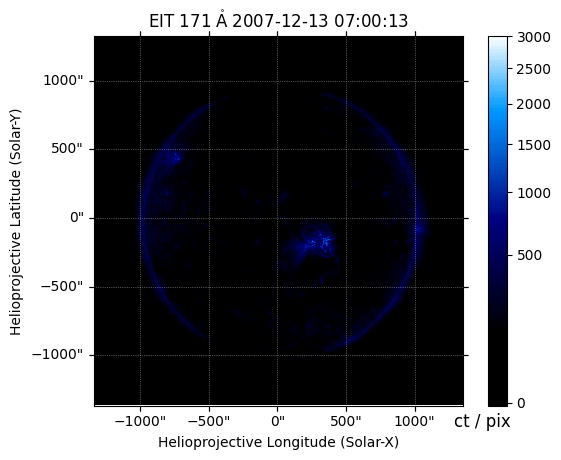

In [ ]:
header = fits.getheader(prep_f)
data = fits.getdata(prep_f)
data = data[::-1, ::-1]
with fits.open(prep_f) as hdul:
    hdul[0].header = header
    hdul[0].data = data
    hdul.writeto("prep.fits", overwrite=True)
prep_map = Map("prep.fits")
prep_map.peek()

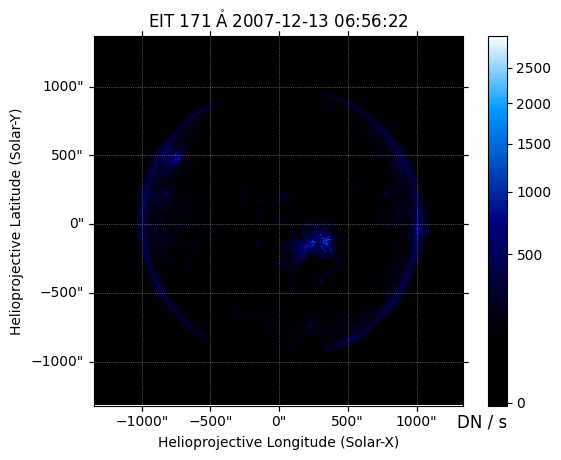

In [ ]:
header = fits.getheader(l1_f)
header["OBSRVTRY"] = 'SOHO'
header["TELESCOP"] = 'SOHO'
header["INSTRUME"] = 'EIT'
with fits.open(l1_f) as hdul:
    hdul[0].header = header
    hdul.writeto("l1.fits", overwrite=True)
map_l1 = Map("l1.fits")
map_l1.peek()

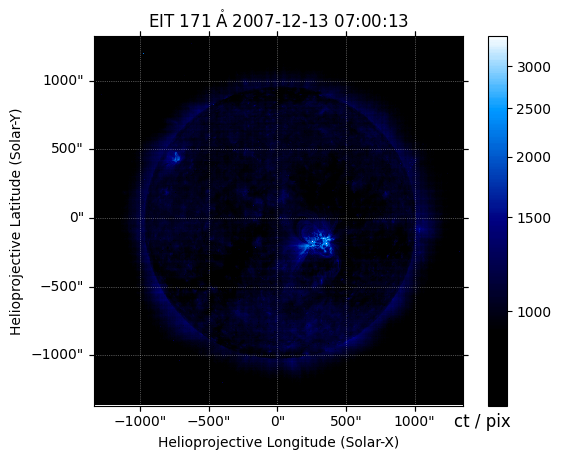

In [ ]:
header = fits.getheader(vso_f)
data = fits.getdata(vso_f)
data = data[::-1, ::-1]
with fits.open(vso_f) as hdul:
    hdul[0].header = header
    hdul[0].data = data
    hdul.writeto("vso.fits", overwrite=True)
vso_map = Map("vso.fits")
vso_map.peek()

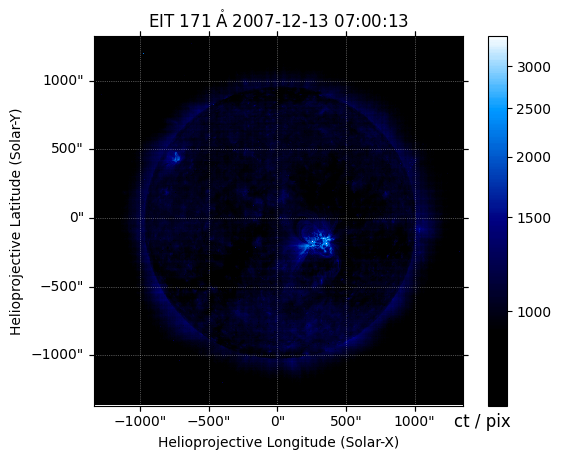

In [ ]:
header = fits.getheader(lz_f)
data = fits.getdata(lz_f)
data = data[::-1, ::-1]
with fits.open(lz_f) as hdul:
    hdul[0].header = header
    hdul[0].data = data
    hdul.writeto("lz.fits", overwrite=True)
lz_map = Map("lz.fits")
lz_map.peek()